# Clustering Solar Energy Production Zones

# Importing Libraries 

In [115]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [116]:
df=pd.read_csv('Statewide Solar Projects.csv')

In [117]:
df.head()

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,12/31/2023,SDG-66301,12/29/2023,Con Ed,Richmond Hill,Queens,11418.0,CENY-BK,Brownsville_2,9B05,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1
1,12/31/2023,SDG-66299,12/29/2023,Con Ed,Bronx,Bronx,10473.0,CENY-BX,Parkchester_2,5X67,Kamtech Solar Solutions,NM,6.74,5.76,7911,NaN,1
2,12/31/2023,SDG-66288,12/29/2023,Con Ed,Brooklyn,Kings,11225.0,CENY-BK,Bensonhurst_2,4B08,SUNCO,NM,3.05,2.61,3585,NaN,1
3,12/31/2023,SDG-66284,12/29/2023,Con Ed,Brooklyn,Kings,11236.0,CENY-BK,Bensonhurst_2,3037,Kamtech Solar Solutions,NM,5.62,4.80,6592,NaN,1
4,12/31/2023,SDG-66277,12/28/2023,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9112,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1


In [118]:
df.tail()

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
218110,12/31/2023,49.0,12/19/2002,RGE,Ontario,Wayne,14519.0,Sodus,0205LS0237-1589 RTE 104,0205LS0237,NaN,NM,2.81,2.4,3296,NaN,1
218111,12/31/2023,48.0,9/24/2002,RGE,Friendship,Allegany,14739.0,Fillmore,8333GV7702-Friendship Nile RD,8333GV7702,NaN,NM,2.93,2.5,3433,NaN,1
218112,12/31/2023,NaN,7/1/2018,PSEGLI,NaN,Suffolk,11786.0,NaN,NaN,NaN,NaN,FIT,34362.00,24900.0,40335490,NaN,1
218113,12/31/2023,NaN,3/3/2018,PSEGLI,NaN,Suffolk,11933.0,NaN,NaN,NaN,NaN,FIT,27600.00,20000.0,32397984,NaN,1
218114,12/31/2023,NaN,11/1/2011,PSEGLI,NaN,Suffolk,11973.0,NaN,NaN,NaN,NaN,FIT,43470.00,31500.0,51026825,NaN,1


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218115 non-null  object 
 1   Project ID                                   218112 non-null  object 
 2   Interconnection Date                         218115 non-null  object 
 3   Utility                                      218115 non-null  object 
 4   City/Town                                    218057 non-null  object 
 5   County                                       218115 non-null  object 
 6   Zip                                          218019 non-null  float64
 7   Division                                     132881 non-null  object 
 8   Substation                                   138171 non-null  object 
 9   Circuit ID                                   218085 non-nul

In [120]:
df.describe()

,Zip,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
count,218019.000000,218115.000000,218115.000000,2.181150e+05,4091.000000,218115.0
mean,11751.734473,24.507977,19.065451,2.876828e+04,32.174727,1.0
std,962.129108,291.525394,211.419642,3.422042e+05,296.161116,0.0
min,10001.000000,0.010000,0.010000,1.400000e+01,0.350000,1.0
25%,11220.000000,5.270000,4.500000,6.180000e+03,5.000000,1.0
50%,11717.000000,7.130000,6.090000,8.364000e+03,7.600000,1.0
75%,12018.000000,10.240000,8.750000,1.201700e+04,10.000000,1.0
max,14905.000000,43470.000000,31500.000000,5.102682e+07,5000.000000,1.0


In [121]:
df.shape

(218115, 17)

### Shape of the dataset and I found there are 218115 rows and 17 columns

In [122]:
df.columns

Index(['Data Through Date', 'Project ID', 'Interconnection Date', 'Utility',
       'City/Town', 'County', 'Zip', 'Division', 'Substation', 'Circuit ID',
       'Developer', 'Metering Method', 'Estimated PV System Size (kWdc)',
       'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)',
       'Energy Storage System Size (kWac)', 'Number of Projects'],
      dtype='object')

From above we assume that:

Interconnection Date: The date when the solar power project was connected to the grid or power distribution system.

Metering Method: The method used to measure and record the solar energy production (e.g., net metering, gross metering).

Estimated PV System Size (kWdc): The estimated size of the photovoltaic (PV) system in kilowatts direct current (kWdc). This represents the total capacity of the solar panels.

PV System Size (kWac): The actual size of the PV system in kilowatts alternating current (kWac). This accounts for system losses and efficiency.

Estimated Annual PV Energy Production (kWh): The projected annual energy production from the PV system in kilowatt-hours (kWh). This estimate considers factors like solar irradiance, panel orientation, and efficiency.

Energy Storage System Size (kWac): If applicable, the size of any energy storage system (such as batteries) connected to the solar project, measured in kilowatts alternating current (kWac).


# Finding Null values

In [123]:
df.isna().sum()

Data Through Date                                   0
Project ID                                          3
Interconnection Date                                0
Utility                                             0
City/Town                                          58
County                                              0
Zip                                                96
Division                                        85234
Substation                                      79944
Circuit ID                                         30
Developer                                       10550
Metering Method                                   463
Estimated PV System Size (kWdc)                     0
PV System Size (kWac)                               0
Estimated Annual PV Energy Production (kWh)         0
Energy Storage System Size (kWac)              214024
Number of Projects                                  0
dtype: int64

# Data Cleaning

In [124]:
df=df.drop(columns=['Project ID','Zip','Circuit ID','Energy Storage System Size (kWac)','Division','Substation'])

### Dropped the 'Project ID','Zip','Circuit ID','Energy Storage System Size (kWac)','Division',and substation column because some of the columns has largest number of null values and some of the columns are not relevant for the analysis.

In [125]:
df.head()

,Data Through Date,Interconnection Date,Utility,City/Town,County,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Number of Projects
0,12/31/2023,12/29/2023,Con Ed,Richmond Hill,Queens,Kamtech Solar Solutions,NM,6.05,5.17,7100,1
1,12/31/2023,12/29/2023,Con Ed,Bronx,Bronx,Kamtech Solar Solutions,NM,6.74,5.76,7911,1
2,12/31/2023,12/29/2023,Con Ed,Brooklyn,Kings,SUNCO,NM,3.05,2.61,3585,1
3,12/31/2023,12/29/2023,Con Ed,Brooklyn,Kings,Kamtech Solar Solutions,NM,5.62,4.80,6592,1
4,12/31/2023,12/28/2023,Con Ed,Springfield Gardens,Queens,Kamtech Solar Solutions,NM,6.05,5.17,7100,1


In [126]:
df['Utility'].unique()

array(['Con Ed', 'PSEGLI', 'O&R', 'Central Hudson', 'National Grid',
       'NYSEG', 'RGE'], dtype=object)

In [127]:
df['City/Town'].nunique()

3009

In [128]:
df['County'].nunique()

62

In [129]:
df.duplicated().sum()

4763

Checking for the duplicates present in the dataset and found that 4763 duplicates value in the dataset. I have cleared the duplicates by using drop_duplicates function.

In [130]:
df.drop_duplicates(inplace=True)

In [131]:
df.duplicated().sum()

0

In [132]:
df['County'].value_counts().head(10)

County
Suffolk        51383
Nassau         31985
Queens         22535
Westchester    12212
Richmond       11397
Kings          11174
Orange          9199
Dutchess        6033
Bronx           5723
Ulster          5273
Name: count, dtype: int64

In [133]:
df.isnull().sum()


Data Through Date                                  0
Interconnection Date                               0
Utility                                            0
City/Town                                         57
County                                             0
Developer                                      10429
Metering Method                                  444
Estimated PV System Size (kWdc)                    0
PV System Size (kWac)                              0
Estimated Annual PV Energy Production (kWh)        0
Number of Projects                                 0
dtype: int64

# Filling missing values

In [134]:
df['City/Town'].value_counts().head(5)

City/Town
STATEN ISLAND    6207
BROOKLYN         5767
Brooklyn         5356
Staten Island    5015
Jamaica          3277
Name: count, dtype: int64

In [135]:
# Convert non-null values to lowercase strings
df['City/Town'] = df['City/Town'].apply(lambda x: str(x).lower())

The code ensures uniformity by converting all 'City/Town' values to lowercase.

In [136]:
df=df.dropna(subset=['City/Town'])

In [137]:
df['County'] = df['County'].apply(lambda x: str(x).lower())

Same like City/Town column I have do for County column to convert all the values to lowercase.

It then removes rows with missing 'County' data, enhancing the DataFrame's consistency and usability for analysis

In [138]:
df=df.dropna(subset=['County'])

In [139]:
df.isnull().sum()

Data Through Date                                  0
Interconnection Date                               0
Utility                                            0
City/Town                                          0
County                                             0
Developer                                      10429
Metering Method                                  444
Estimated PV System Size (kWdc)                    0
PV System Size (kWac)                              0
Estimated Annual PV Energy Production (kWh)        0
Number of Projects                                 0
dtype: int64

In [140]:
df['Developer'].nunique()

2567

In [141]:
df['Developer'].value_counts().head(10)

Developer
Vivint Solar                   12694
MOMENTUM SOLAR                 12436
Sunrun Inc                     11437
Solar City                     11326
Other                           6262
Trinity Solar                   5282
SolarCity                       4834
Venture Solar                   4781
Long Island Power Solutions     4470
Sunrun, Inc.                    4171
Name: count, dtype: int64

In [142]:
import random
df['Developer'].fillna(random.choice(df['Developer'].dropna().unique()), inplace=True)


Then I checked Unique values for Developer Column.

And Filled the developer column null values by using Random Choice Function

In [143]:
df.isnull().sum()

Data Through Date                                0
Interconnection Date                             0
Utility                                          0
City/Town                                        0
County                                           0
Developer                                        0
Metering Method                                444
Estimated PV System Size (kWdc)                  0
PV System Size (kWac)                            0
Estimated Annual PV Energy Production (kWh)      0
Number of Projects                               0
dtype: int64

In [144]:
df['Developer'].nunique()

2567

In [145]:
df['Metering Method'].nunique()

6

In [146]:
df['Metering Method'].value_counts()

Metering Method
NM     210689
RNM      1040
CDG       996
RC         91
FIT        88
RFP         4
Name: count, dtype: int64

Checked Unique values in Metering Method Column and I found there are only 6 unique values.

In [147]:
df['Metering Method'].fillna(df['Metering Method'].mode()[0], inplace=True)

And most of the values are from NM So I filled metering method null values by using mode function

In [148]:

df['Metering Method'].value_counts()

Metering Method
NM     211133
RNM      1040
CDG       996
RC         91
FIT        88
RFP         4
Name: count, dtype: int64

In [149]:
df.isnull().sum()

Data Through Date                              0
Interconnection Date                           0
Utility                                        0
City/Town                                      0
County                                         0
Developer                                      0
Metering Method                                0
Estimated PV System Size (kWdc)                0
PV System Size (kWac)                          0
Estimated Annual PV Energy Production (kWh)    0
Number of Projects                             0
dtype: int64

In [150]:
df['Interconnection Date']=pd.to_datetime(df['Interconnection Date'])

I converts the 'Interconnection Date' column to datetime format

In [151]:
df['Interconnection Date'].dt.month.unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int32)

extracts the month component

In [152]:
df['Interconnection Date'] = df['Interconnection Date'].dt.month

replacing the original column with the month values.And then I saved it to the dataframe.

In [153]:
df['Interconnection Date'].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1], dtype=int32)

In [154]:
df['Data Through Date']=pd.to_datetime(df['Data Through Date'])

In [155]:
df['Data Through Date'].dt.month.unique()

array([12], dtype=int32)

In [156]:
df['Data Through Date'] = df['Data Through Date'].dt.month

In [157]:
df['Data Through Date'].unique()

array([12], dtype=int32)

In [158]:
df.head()

,Data Through Date,Interconnection Date,Utility,City/Town,County,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Number of Projects
0,12,12,Con Ed,richmond hill,queens,Kamtech Solar Solutions,NM,6.05,5.17,7100,1
1,12,12,Con Ed,bronx,bronx,Kamtech Solar Solutions,NM,6.74,5.76,7911,1
2,12,12,Con Ed,brooklyn,kings,SUNCO,NM,3.05,2.61,3585,1
3,12,12,Con Ed,brooklyn,kings,Kamtech Solar Solutions,NM,5.62,4.80,6592,1
4,12,12,Con Ed,springfield gardens,queens,Kamtech Solar Solutions,NM,6.05,5.17,7100,1


Then I renamed the Interconnection date column to Interconnection month

same as data through date column to data through month.

In [159]:
# Rename the "Interconnection Date" column to "Interconnection Month"
df.rename(columns={'Interconnection Date': 'Interconnection Month'}, inplace=True)

# Rename the "Data Through Date" column to "Data Through Month"
df.rename(columns={'Data Through Date': 'Data Through Month'}, inplace=True)

In [160]:
df.isnull().sum()

Data Through Month                             0
Interconnection Month                          0
Utility                                        0
City/Town                                      0
County                                         0
Developer                                      0
Metering Method                                0
Estimated PV System Size (kWdc)                0
PV System Size (kWac)                          0
Estimated Annual PV Energy Production (kWh)    0
Number of Projects                             0
dtype: int64

# EDA

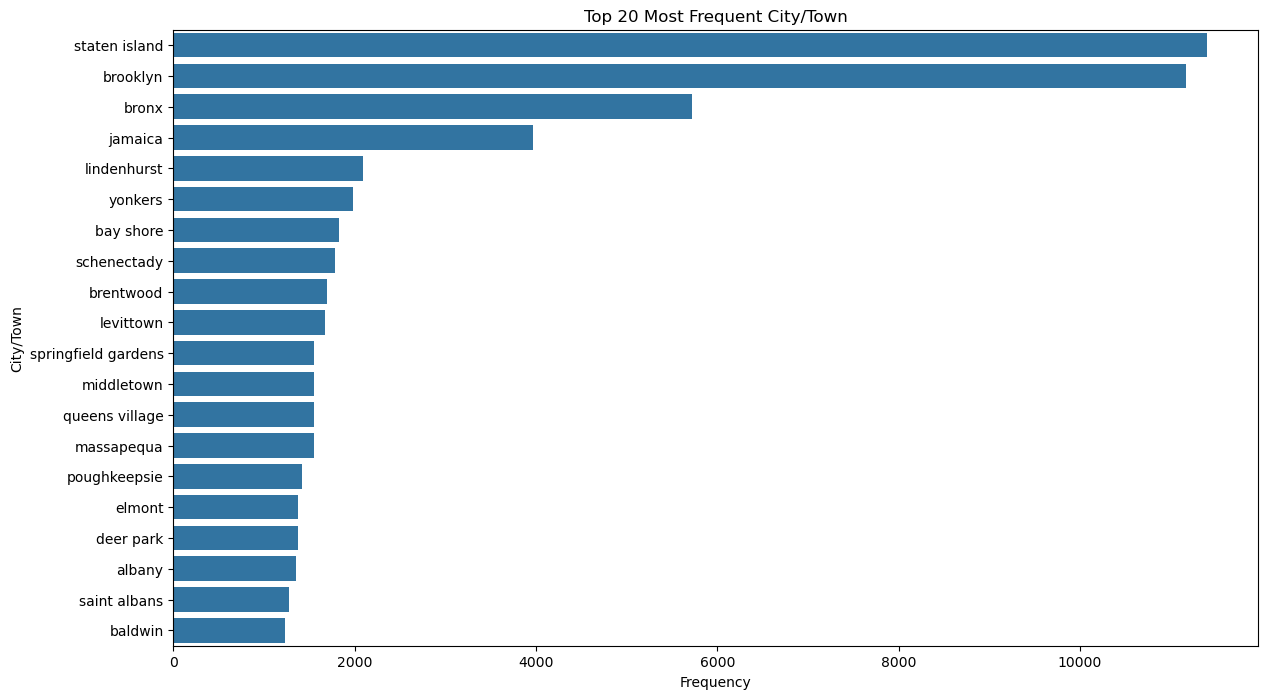

In [161]:
# Plot distribution of City/Town frequencies using a count plot
plt.figure(figsize=(14, 8))
sns.countplot(y='City/Town', data=df, order=df['City/Town'].value_counts().iloc[:20].index)
plt.title('Top 20 Most Frequent City/Town')
plt.xlabel('Frequency')
plt.ylabel('City/Town')
plt.show()

# Findings
Staten Island City has the highest frequency, exceeding 10,000 occurrences.

Brooklyn ranks second in frequency but falls slightly behind Staten Island.

Baldwin City records the lowest frequency among the observed locations.

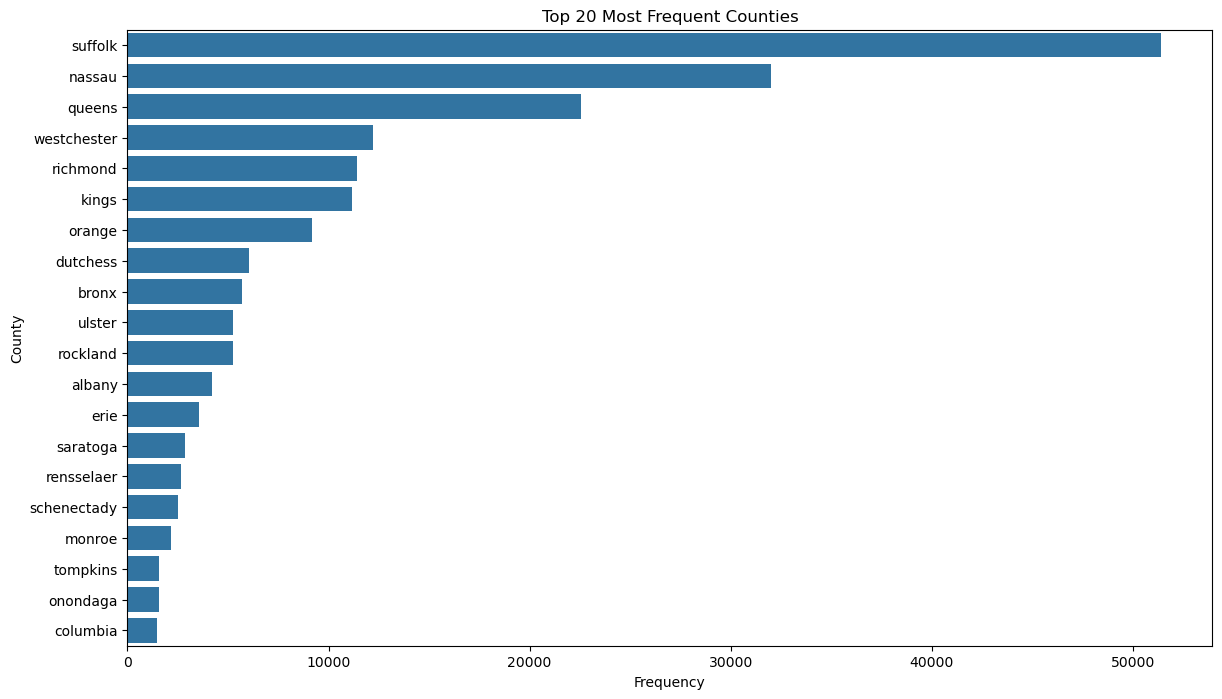

In [162]:
# Plot distribution of County frequencies using a count plot
plt.figure(figsize=(14, 8))
sns.countplot(y='County', data=df, order=df['County'].value_counts().iloc[:20].index)
plt.title('Top 20 Most Frequent Counties')
plt.xlabel('Frequency')
plt.ylabel('County')
plt.show()

# Findings on Top 20 Most Frequent Counties
Suffolk County emerges as the most frequent county, with a frequency exceeding 50,000.

Nassau County follows closely, with a frequency ranging between 30,000 and 40,000.

Columbia County exhibits the lowest frequency among all counties surveyed.


# Bivariate Analysis : Understand type of relationship between 2 columns

<Axes: xlabel='PV System Size (kWac)', ylabel='Estimated Annual PV Energy Production (kWh)'>

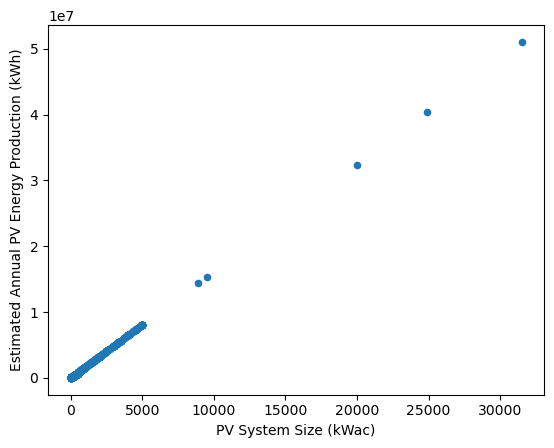

In [163]:
#Scatter plot of PV System Size (kWac) vs Estimated Annual PV Energy Production (kWh)
df.plot.scatter(x='PV System Size (kWac)', y='Estimated Annual PV Energy Production (kWh)')

# Findings
I have used the scatter plot to see the linear relationship between PV system size (kWac) and estimated annual PV energy production (kWh).

But It is not showing me the linear relationship between both the columns.

The presence of outliers are influencing the relationship between PV system size and estimated annual PV energy production.

# Outliers Detection
Boxplots helped find unusual data points (outliers) in the columns: 'Estimated PV System Size (kWdc)', 'PV System Size (kWac)', and 'Estimated Annual PV Energy Production (kWh)'.

To address outliers, a formula was applied that capped extreme values at 1.5 times the range between the first and third quartiles.

## IQR Method

1)Calculate the first quartile (25th percentile).

2)Calculate the third quartile (75th percentile).

3)Calculate the interquartile range (IQR) as the difference between Q3 and Q1.

4)Calculate the lower limit as Q1 minus 1.5 times the IQR.

5)Calculate the upper limit as Q3 plus 1.5 times the IQR.

6)Apply a lambda function to each value in the column. If a value is less than the lower limit, it is replaced with the lower limit. If a value is greater than the upper limit, it is replaced with the upper limit. Otherwise, the value remains unchanged.

.

.

# Estimated PV System Size (kWdc)

<Axes: xlabel='Estimated PV System Size (kWdc)'>

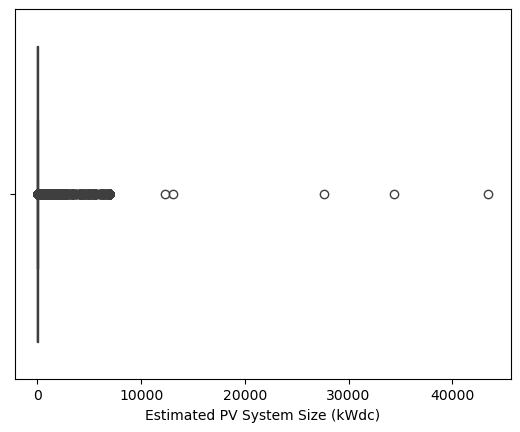

In [164]:
sns.boxplot(x='Estimated PV System Size (kWdc)', data=df)

In [165]:

column_to_cap = 'Estimated PV System Size (kWdc)'

Q1 = df[column_to_cap].quantile(0.25)
Q3 = df[column_to_cap].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df[column_to_cap] = df[column_to_cap].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

In [166]:
lower_limit

-2.2250000000000005

In [167]:
upper_limit

17.815

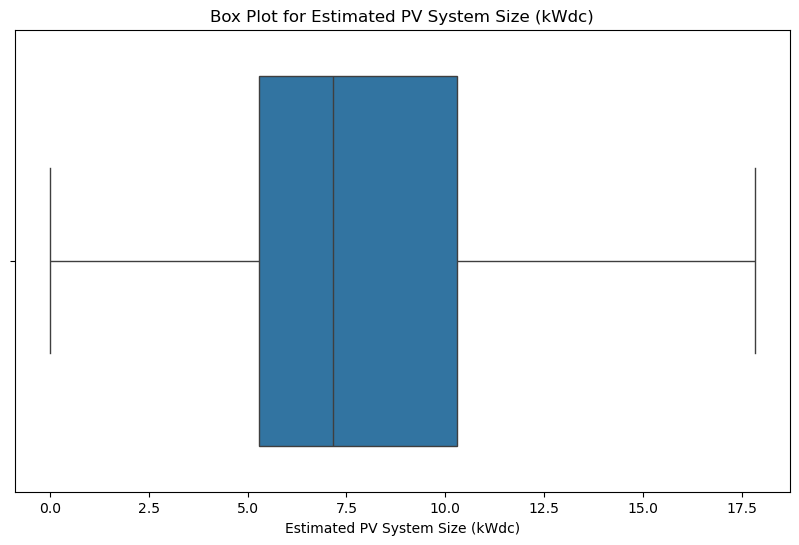

In [168]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Estimated PV System Size (kWdc)'])
plt.title('Box Plot for Estimated PV System Size (kWdc)')
plt.show()

PV System Size (kWac)

<Axes: xlabel='PV System Size (kWac)'>

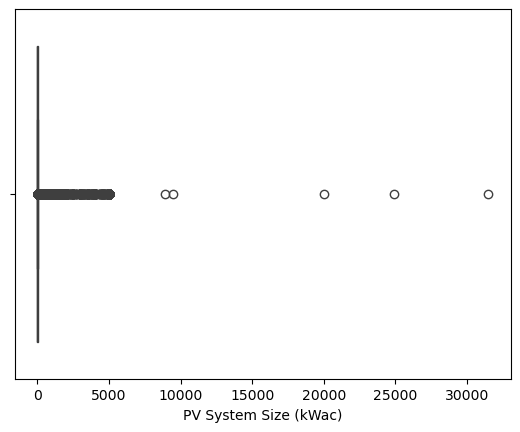

In [169]:
sns.boxplot(x='PV System Size (kWac)', data=df)

In [170]:
column_to_cap = 'PV System Size (kWac)'

Q1 = df[column_to_cap].quantile(0.25)
Q3 = df[column_to_cap].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df[column_to_cap] = df[column_to_cap].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

In [171]:
lower_limit

-1.9000000000000021

In [172]:
upper_limit

15.220000000000002

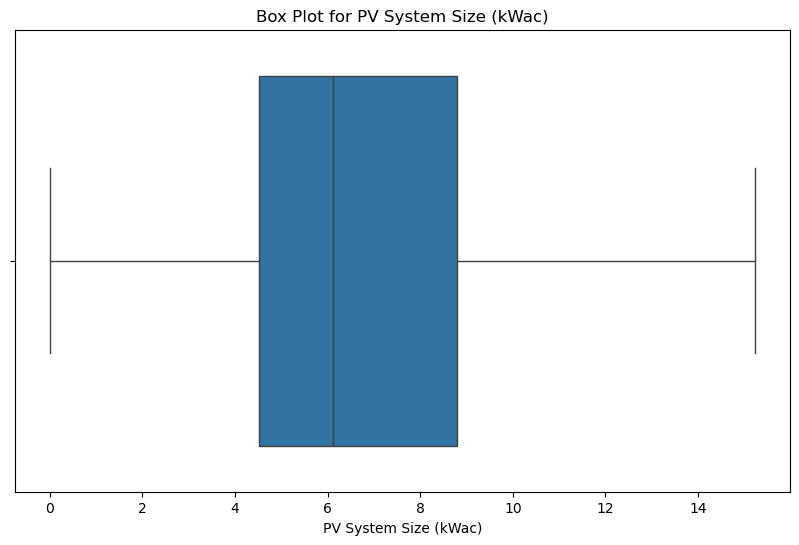

In [173]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['PV System Size (kWac)'])
plt.title('Box Plot for PV System Size (kWac)')
plt.show()

Estimated Annual PV Energy Production (kWh)

<Axes: xlabel='Estimated Annual PV Energy Production (kWh)'>

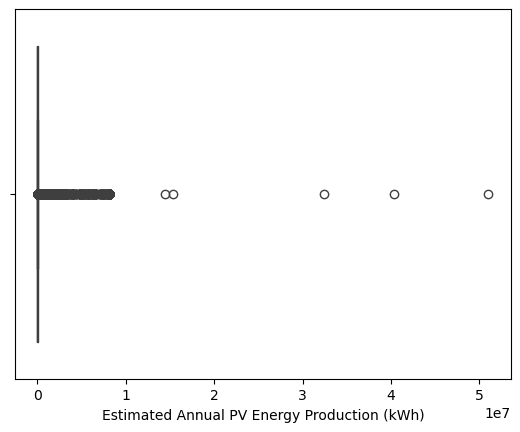

In [174]:
sns.boxplot(x='Estimated Annual PV Energy Production (kWh)', data=df)

In [175]:
column_to_cap = 'Estimated Annual PV Energy Production (kWh)'

Q1 = df[column_to_cap].quantile(0.25)
Q3 = df[column_to_cap].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df[column_to_cap] = df[column_to_cap].apply(lambda x: lower_limit if x < lower_limit else (upper_limit if x > upper_limit else x))

In [176]:
lower_limit

-2609.0

In [177]:
upper_limit

20903.0

<Axes: xlabel='Estimated Annual PV Energy Production (kWh)'>

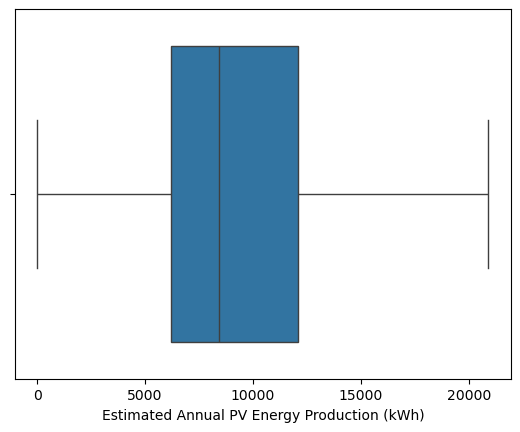

In [178]:
sns.boxplot(x='Estimated Annual PV Energy Production (kWh)', data=df)

<Axes: title={'center': 'Histogram of Estimated Annual PV Energy Production (kWh)'}, ylabel='Frequency'>

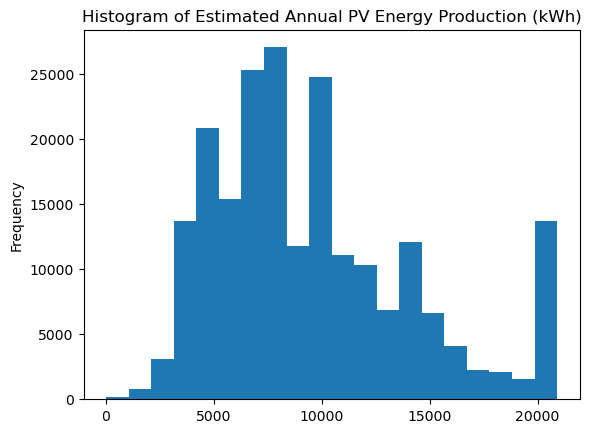

In [179]:
df['Estimated Annual PV Energy Production (kWh)'].plot(kind='hist', bins=20, title='Histogram of Estimated Annual PV Energy Production (kWh)')

# Findings
The histogram of estimated annual PV energy production (kWh) reveals a distribution of frequencies across different production ranges.

The range from 5000 to 10000 kWh exhibits the highest frequency, indicating a significant concentration of energy production within this range.

There is a moderate increase in frequency from 10000 to 15000 kWh, suggesting a gradual rise in energy production within this range.

Beyond 15000 kWh up to 20000 kWh, the frequency shows a decrease, indicating a lower occurrence of energy production in this higher range.

<Axes: title={'center': 'Histogram of PV System Size (kWac)'}, ylabel='Frequency'>

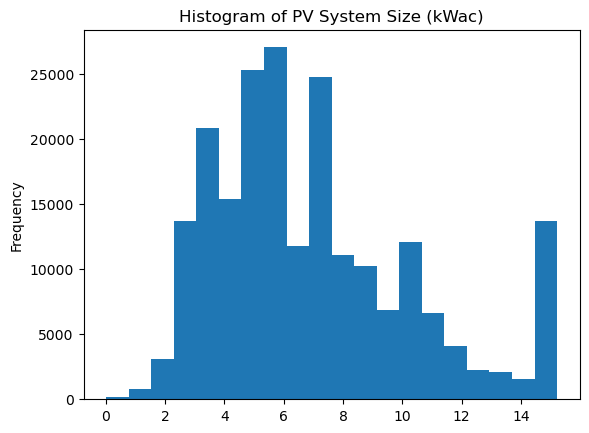

In [180]:
df['PV System Size (kWac)'].plot(kind='hist', bins=20, title='Histogram of PV System Size (kWac)')

# Findings
The histogram of PV System Size (kWac) displays the distribution of frequencies across different system size ranges.

The range from 4 to 6 kWac exhibits the highest frequency, indicating a significant concentration of PV systems within this size range.

There is a moderate increase in frequency from 8 to 10 kWac, suggesting a gradual rise in the number of PV systems within this size range.

Beyond 12 to 14 kWac, the frequency shows a decrease, indicating a lower occurrence of PV systems in this larger size range.

<Axes: title={'center': 'Estimated PV System Size (kWdc)'}, ylabel='Frequency'>

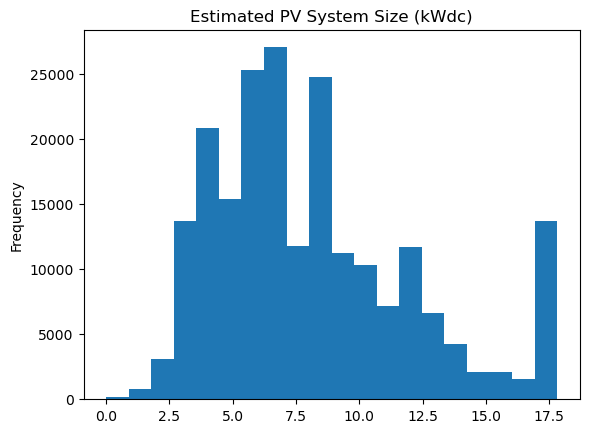

In [181]:
df['Estimated PV System Size (kWdc)'].plot(kind='hist', bins=20, title='Estimated PV System Size (kWdc)')

# Findings
The histogram of Estimated PV System Size (kWdc) illustrates the distribution of frequencies across different system size ranges.

The range from 5.0 to 7.5 kWdc exhibits the highest frequency, indicating a significant concentration of estimated system sizes within this range.

There is a moderate increase in frequency from 10.0 to 12.5 kWdc, suggesting a gradual rise in the number of estimated system sizes within this range.

Beyond 15.0 to 17.5 kWdc, the frequency shows a decrease, indicating a lower occurrence of estimated system sizes in this larger range.

In [182]:
# Calculate correlation between PV system size and energy production
correlation = df['PV System Size (kWac)'].corr(df['Estimated Annual PV Energy Production (kWh)'])
print("Correlation between PV System Size and Energy Production:", correlation)

Correlation between PV System Size and Energy Production: 0.9999999794039943


correlation between PV System size and Estimated Annual PV Energy Production (kWh) and I found that there is 99% correlation between both the columns.

linkcode
it shows columns are highly correlated.

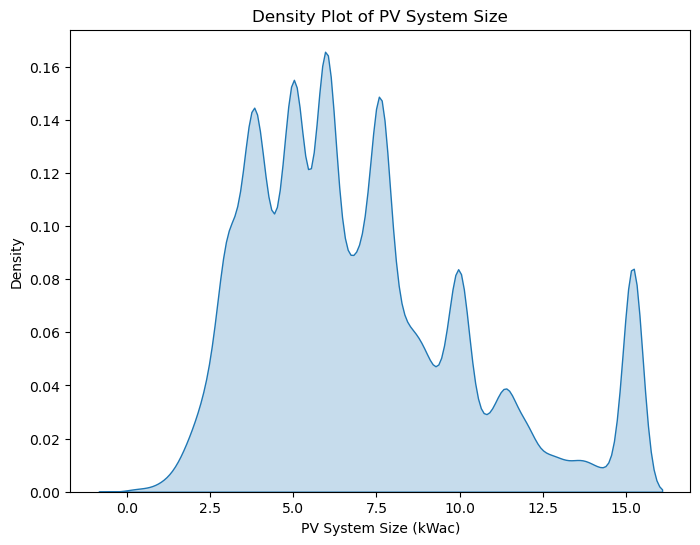

In [183]:

# Density plot of PV system size
plt.figure(figsize=(8, 6))
sns.kdeplot(df['PV System Size (kWac)'], shade=True)
plt.title('Density Plot of PV System Size')
plt.xlabel('PV System Size (kWac)')
plt.ylabel('Density')
plt.show()

<Axes: title={'center': 'Scatter plot'}, xlabel='PV System Size (kWac)', ylabel='Estimated Annual PV Energy Production (kWh)'>

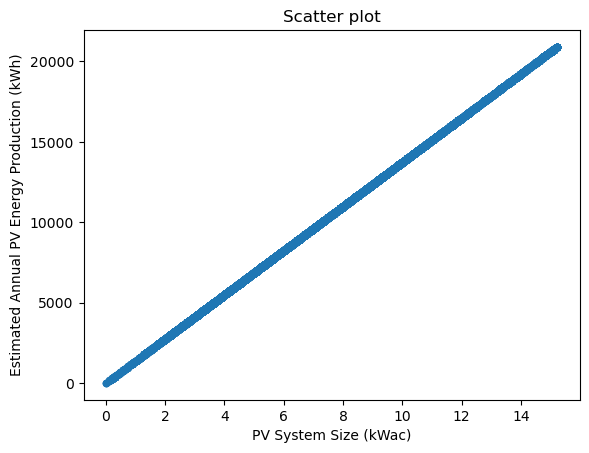

In [184]:
#Scatter plot of PV System Size (kWac) vs Estimated Annual PV Energy Production (kWh)
df.plot.scatter(x='PV System Size (kWac)', y='Estimated Annual PV Energy Production (kWh)', title='Scatter plot')

# Findings
linkcode
I have used the scatter plot to see the linear relationship between PV system size (kWac) and estimated annual PV energy production (kWh).

After Removing the Outliers, It is showing me the linear relationship between both the columns.

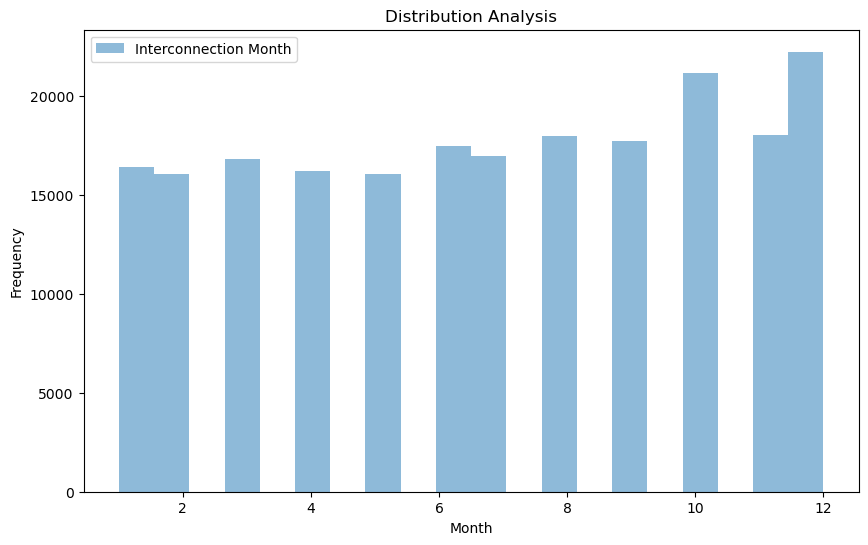

In [185]:

# Plotting histograms for distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Interconnection Month'], bins=20, alpha=0.5, label='Interconnection Month')
plt.title('Distribution Analysis')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend()
plt.show()
# use bar plot to show the distribution

# Findings
December month has Peaks in frequency with higher interconnection rates as compare to other months

Scaling using MinMaxScaler
The MinMaxScaler scales the features to a fixed range between 0 and 1, ensuring that all features are standardized and have a comparable scale.

MinMaxScaler to perform min-max scaling on three numerical features: 'Estimated PV System Size (kWdc)', 'PV System Size (kWac)', and 'Estimated Annual PV Energy Production (kWh)'.

In [186]:
scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(df[['Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)']])

scaled_df = pd.DataFrame(scaled_features, columns=['Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)'])

In [187]:
finaldf = scaled_df[['Estimated PV System Size (kWdc)','PV System Size (kWac)','Estimated Annual PV Energy Production (kWh)']]

In [188]:
finaldf.head()

,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh)
0,0.339231,0.339250,0.339222
1,0.377984,0.378041,0.378046
2,0.170739,0.170940,0.170951
3,0.315080,0.314924,0.314903
4,0.339231,0.339250,0.339222


In [189]:
X = finaldf[['Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)']].values

I saved that finaldf dataframe into X variable

# Model Building
# K-Means Clustering Algorithm
K-means clustering is an unsupervised machine learning algorithm.

It partitions a dataset into K distinct clusters.

The objective is to minimize the within-cluster variance.

Each cluster is represented by its centroid, calculated as the mean of the data points in the cluster.

The algorithm iteratively assigns data points to the nearest centroid and updates the centroids

K-means clustering finds applications in customer segmentation, image segmentation, and anomaly detection, among others.

In [190]:
def calculate_distortion(X, n_clusters):
    distortions = []
    for i in range(1, n_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    return distortions

The function takes two arguments: X (the dataset) and n_clusters (the maximum number of clusters to consider).

It initializes an empty list called distortions to store the distortion values for each number of clusters.

It iterates through each possible number of clusters from 1 to n_clusters.

For each iteration, it creates a KMeans object with the specified number of clusters and fits it to the dataset X.

It computes the inertia of the KMeans model, which is a measure of how tightly clustered the data points are around the centroids.

The inertia value is appended to the distortions list.

Finally, the function returns the list of distortion values for different numbers of clusters.

In [191]:
def plot_elbow(distortions, n_clusters):
    plt.plot(range(1, n_clusters + 1), distortions, marker='o')
    plt.title('Elbow Plot')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

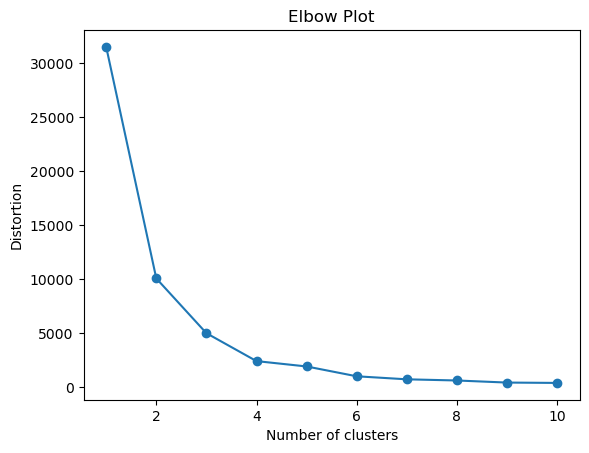

In [192]:
distortions = calculate_distortion(X, n_clusters=10)
plot_elbow(distortions, n_clusters=10)


Based on the elbow method, 3 appears to be the most suitable number of clusters for the given dataset.

This insight can guide further analysis and decision-making processes, such as segmenting data into distinct groups for targeted actions or understanding underlying patterns within the data

In [193]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

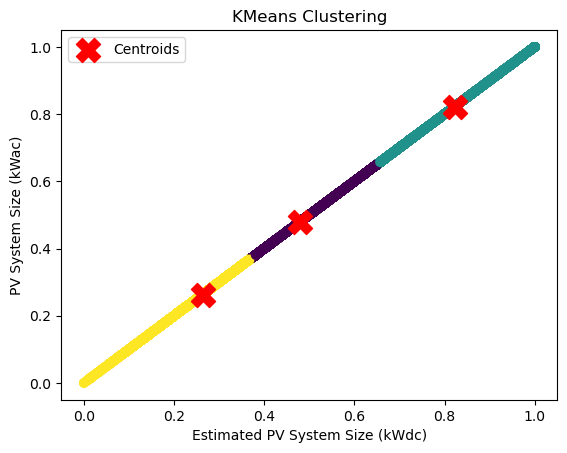

In [194]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Estimated PV System Size (kWdc)')
plt.ylabel('PV System Size (kWac)')
plt.legend()
plt.show()

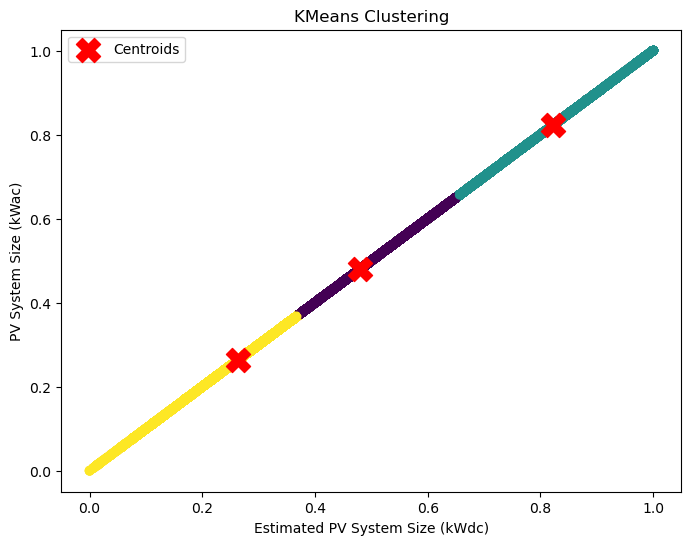

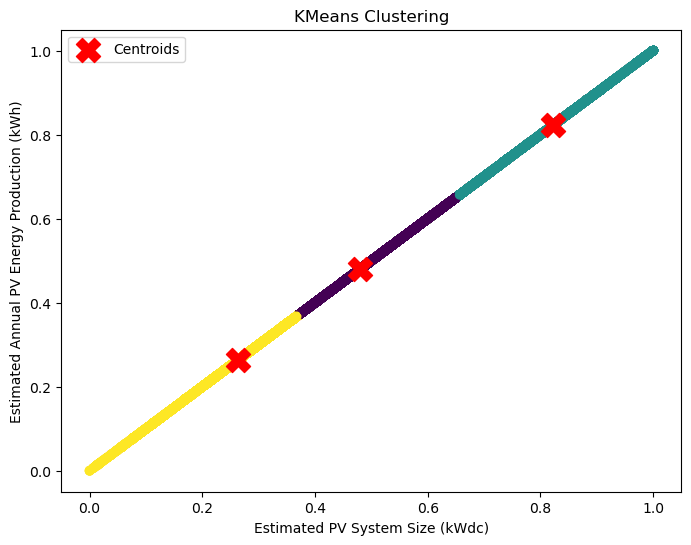

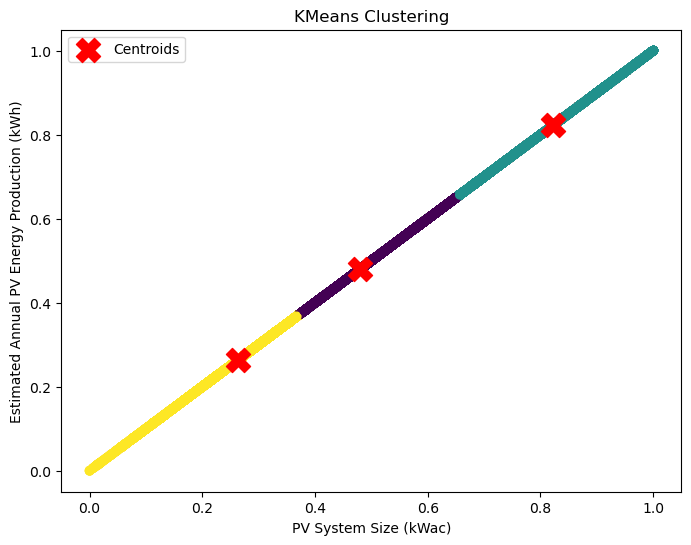

In [195]:
feature_names = ['Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)']

for i in range(len(feature_names)):
    for j in range(i + 1, len(feature_names)):
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, i], X[:, j], c=labels, cmap='viridis')
        plt.scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, j], s=300, c='red', marker='X', label='Centroids')
        plt.title('KMeans Clustering')
        plt.xlabel(feature_names[i])
        plt.ylabel(feature_names[j])
        plt.legend()
        plt.show()

The linear grouping and placement of centroids suggest that the algorithm effectively separates the data into three clusters based on their feature values.

In [203]:
print(labels)

[0, 1, 2, 0, 1]


In [204]:
print(df.head())

   SomeFeature  Cluster        Segment
0            1        0     lower zone
1            2        1  moderate zone
2            3        2    higher zone
3            4        0     lower zone
4            5        1  moderate zone


In [205]:
print(segmentation_map)

{0: 'lower zone', 1: 'moderate zone', 2: 'higher zone'}


In [206]:
print(df['Segment'].isna().sum())

0


In [207]:
import pandas as pd

# Sample data
data = {
    'SomeFeature': [1, 2, 3, 4, 5]
}
df = pd.DataFrame(data)

# Example labels
labels = [0, 1, 2, 0, 1]  # Ensure these are valid cluster labels
df['Cluster'] = labels

# Segmentation mapping
segmentation_map = {
    0: 'lower zone',
    1: 'moderate zone',
    2: 'higher zone'
}

# Create Segment column
df['Segment'] = df['Cluster'].map(segmentation_map)

# Check the result
print(df)

   SomeFeature  Cluster        Segment
0            1        0     lower zone
1            2        1  moderate zone
2            3        2    higher zone
3            4        0     lower zone
4            5        1  moderate zone


# Conclusion

The addition of the 'Cluster' and 'Segment' columns enables the DataFrame to categorize each data point into meaningful segments based on the clustering results.

In the higher zone, the estimated annual PV energy production is the highest at 18.67k, followed by 11.32k in the lower zone and 6.12k in the moderate zone.

The average PV system size in the higher zone is the highest among all zones, indicating larger solar installations in this area.

In December, all annual PV energy production occurs, indicating that December is a significant month for solar energy production, potentially due to favorable weather conditions or operational factors.